In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
stats = {
    ('mincuts', 'distribution', 'ks'),
    ('diameter', 'scalar', 'rel_diff'),
    ('mixing_mus', 'distribution', 'ks'),
    ('global_ccoeff', 'scalar', 'abs_diff'),
    ('local_ccoeff', 'scalar', 'abs_diff'),
    ('deg_assort', 'scalar', 'rel_diff'),
    ('degree', 'distribution', 'ks'),
    ('mixing_xi', 'scalar', 'abs_diff'),
    ('c_size', 'distribution', 'ks'),
    ('c_edges', 'distribution', 'ks'),
    ('ratio_disconnected_clusters','scalar','abs_diff'),
    ('n_wellconnected_clusters','scalar','rel_diff'),
    ('ratio_wellconnected_clusters','scalar','abs_diff'),
    ('n_concomp','scalar','rel_diff'),
    ('concomp_sizes','distribution','ks'),
    ('n_nodes','scalar','rel_diff'),
    ('n_edges','scalar','rel_diff'),
    ('n_clusters','scalar','rel_diff')
    
}

In [13]:
networks = ['cit_hepph','cit_patents','cen','orkut','wiki_talk','wiki_topcats','academia_edu','dbpedia_producer','hyves','plant_pol_robertson','advogato','dbpedia_recordlabel','inploid','polblogs','anybeat','dbpedia_starring','interactome_figeys','power','at_migrations','dbpedia_team','interactome_stelzl','prosper','berkstan_web','dbpedia_writer','interactome_vidal','python_dependency','bible_nouns','dbtropes_feature','internet_as','reactome','bibsonomy','digg_votes','jdk','slashdot_threads','bitcoin_alpha','discogs_label','jester','slashdot_zoo','bitcoin_trust','dnc','jung','sp_infectious','bookcrossing','douban','lastfm_aminer','stackoverflow','drosophila_flybi','libimseti','stanford_web','elec','linux','topology','chess','email_enron','livemocha','twitter','chicago_road','email_eu','lkml_reply','twitter_15m','citeseer','epinions','lkml_thread','uni_email','citeulike','epinions_trust','marker_cafe','us_air_traffic','escorts','marvel_universe','visualizeus','eu_procurements','movielens_100k','wiki_article_words','faa_routes','myspace_aminer','wikiconflict','facebook_wall','nematode_mammal','wiki_link_dyn','collins_yeast','fediverse','netscience','wiki_rfa','cora','flickr_groups','new_zealand_collab','corporate_directors','fly_hemibrain','notre_dame_web','dblp_cite','fly_larva','openflights','dblp_coauthor_snap','foldoc','dbpedia_country','github','wiki_users','dbpedia_genre','google','paris_transportation','word_assoc','dbpedia_location','google_plus','petster','wordnet','dbpedia_occupation','google_web','pgp_strong','yahoo_ads']
simulators = ['sbm','sbm_mcs']
resolutions = ['0.001']


stat_df = pd.DataFrame()
for stat, stat_type, distance_type in stats:
    for network in networks:
        stat_values = {}
        for simulator in simulators:
            for resolution in resolutions:
                stat_distances = []
                for rep in range(11):
                    try:
                        path = f'/projects/engrit/chackoge/lanne2/network_evaluation/SBM_subnetworks_samples/{network}_{resolution}/{simulator}/rep_{rep}/compare_stats.csv'
                        df = pd.read_csv(path)
                        df = df.loc[
                            (df['stat'] == stat)
                            & (df['stat_type'] == stat_type)
                            & (df['distance_type'] == distance_type)
                        ]
                        stat_distances.append(df['distance'].values[0])
                    except Exception as e:
                        print(e)
                        print(f"Fetching stats failed for {network} {simulator} {resolution} {stat} {rep}")
                
                stat_values[f'{simulator}_{resolution}_mean'] = np.mean(stat_distances) if stat_distances else np.nan
                stat_values[f'{simulator}_{resolution}_std'] = np.std(stat_distances) if stat_distances else np.nan

        row_values = [stat,stat_type, distance_type,network] 
        index =  ['stat','stat_type','distance_type','Network']
        for key, value in stat_values.items():
            index.append(key)
            row_values.append(value)
        for i in index:
            if i not in stat_df.columns:
                stat_df[i] = np.nan
        new_row = pd.Series(row_values, index = index)
        stat_df.loc[len(stat_df)] = new_row
    


In [14]:
print(stat_df.to_string(index=False))

                        stat    stat_type distance_type              Network sbm_0.001_mean sbm_0.001_std sbm_mcs_0.001_mean sbm_mcs_0.001_std
                      degree distribution            ks            cit_hepph        0.00712      0.000199           0.009661          0.000835
                      degree distribution            ks          cit_patents       0.012549      0.000059            0.03027          0.000082
                      degree distribution            ks                  cen        0.00581      0.000018           0.053015          0.000076
                      degree distribution            ks                orkut       0.005031      0.000011           0.004746          0.000025
                      degree distribution            ks            wiki_talk       0.015067      0.000182           0.207383          0.001371
                      degree distribution            ks         wiki_topcats       0.010184      0.000075           0.032631          0.000113

In [16]:
stat_df.to_csv('110_subnetworks_comparison_data.csv', index=False)

In [15]:

# Group by 'Stat' and calculate the required ratios and counts
grouped = stat_df.groupby('stat').apply(lambda group: (
    group.name,  # Get the stat label
    sum(group['sbm_0.001_mean'].notna() & group['sbm_mcs_0.001_mean'].notna() & (abs(group['sbm_0.001_mean']) >= abs(group['sbm_mcs_0.001_mean']))),
    min(group['sbm_0.001_mean'].notna().sum(),group['sbm_mcs_0.001_mean'].notna().sum()),
    sum(group['sbm_0.001_mean'].notna() & group['sbm_mcs_0.001_mean'].notna() & (abs(group['sbm_0.001_mean']) >= abs(group['sbm_mcs_0.001_mean'])))/sum(group['sbm_0.001_mean'].notna() & group['sbm_mcs_0.001_mean'].notna()),
    # np.mean((abs(group['sbm_0.001_mean'] - group['sbm_mcs_0.001_mean'])))
))

# Create a new DataFrame to store results
results_df = pd.DataFrame(grouped.values.tolist(), columns=['stat', 'Distance sbm >= sbm_mcs', 'Total_number_of_networks_considered','Proportion successful'])

# Print the results
print(results_df.to_string(index=False))

                        stat  Distance sbm >= sbm_mcs  Total_number_of_networks_considered  Proportion successful
                     c_edges                      110                                  110               1.000000
                      c_size                      110                                  110               1.000000
               concomp_sizes                      110                                  110               1.000000
                  deg_assort                       16                                  110               0.145455
                      degree                       47                                  110               0.427273
                    diameter                       47                                  110               0.427273
               global_ccoeff                       48                                  110               0.436364
                local_ccoeff                       67                                  1

## PLOTTING

### Distribution Stats

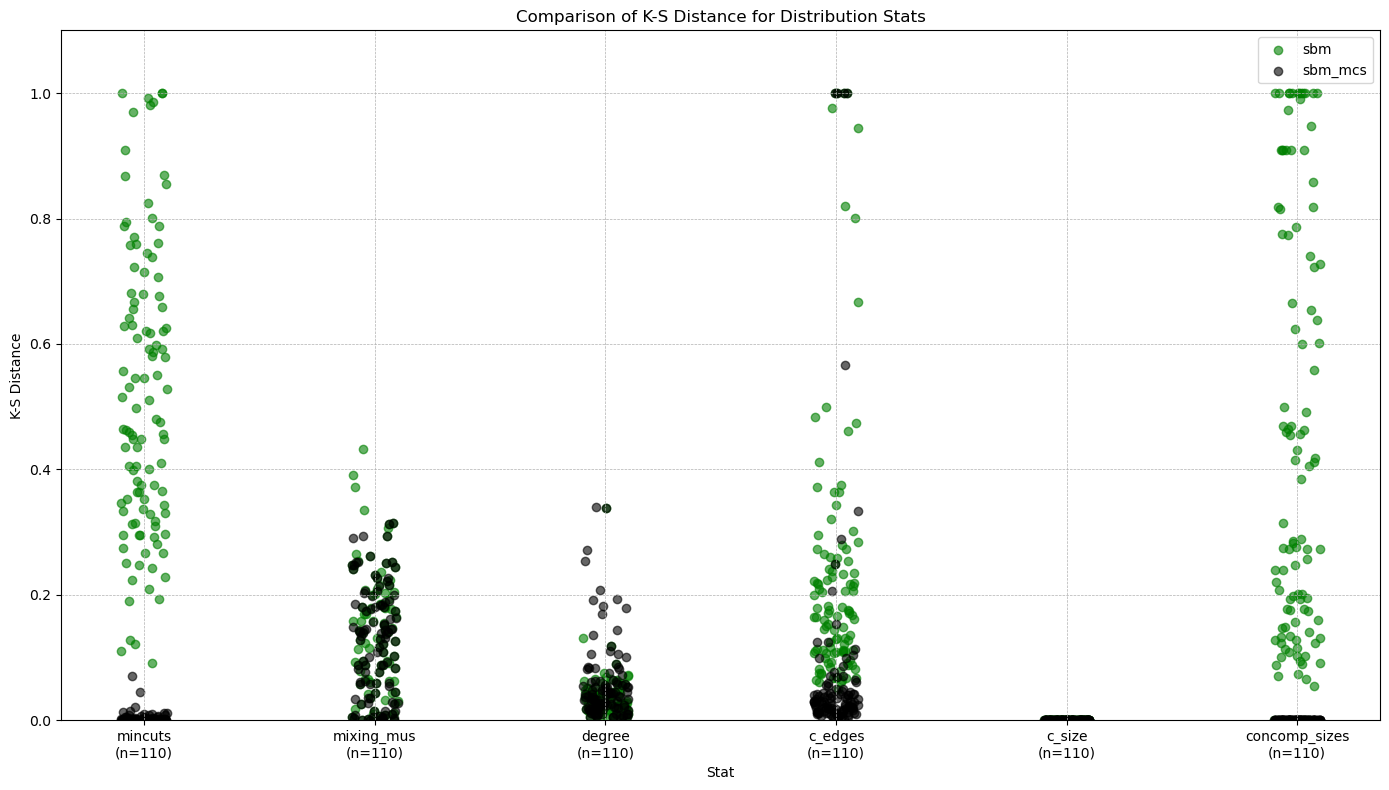

In [95]:
req_stats = ['mincuts','mixing_mus','degree','c_edges','c_size','concomp_sizes']
# Calculate the number of non-NaN values for each stat
non_nan_counts = stat_df.groupby('stat').apply(lambda x: x[['sbm_0.001_mean', 'sbm_mcs_0.001_mean']].notna().all(axis=1).sum())

# Plotting
plt.figure(figsize=(14, 8))

# Add jitter for visualization
jitter = 0.1
x_values = {stat: i for i, stat in enumerate(req_stats)}

# Plot each stat separately
for stat in req_stats:
    specific_stat_df = stat_df[stat_df['stat'] == stat]
    
    x_pos = x_values[stat] + np.random.uniform(-jitter, jitter, size=len(specific_stat_df))
    
    plt.scatter(x_pos, specific_stat_df['sbm_0.001_mean'], color='green', label='sbm' if stat == req_stats[0] else "", alpha=0.6)
    plt.scatter(x_pos, specific_stat_df['sbm_mcs_0.001_mean'], color='black', label='sbm_mcs' if stat == req_stats[0] else "", alpha=0.6)

# Customize plot
plt.xlabel('Stat')
plt.ylabel('K-S Distance')
plt.ylim(0, 1.1)
plt.title('Comparison of K-S Distance for Distribution Stats')
# Create x-tick labels with non-NaN counts
x_tick_labels = [f"{stat}\n(n={non_nan_counts[stat]})" for stat in req_stats]
plt.xticks(list(x_values.values()), x_tick_labels, rotation=0)
# plt.xticks(list(x_values.values()), list(x_values.keys()), rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

### Scalar Stats - Rel Diff

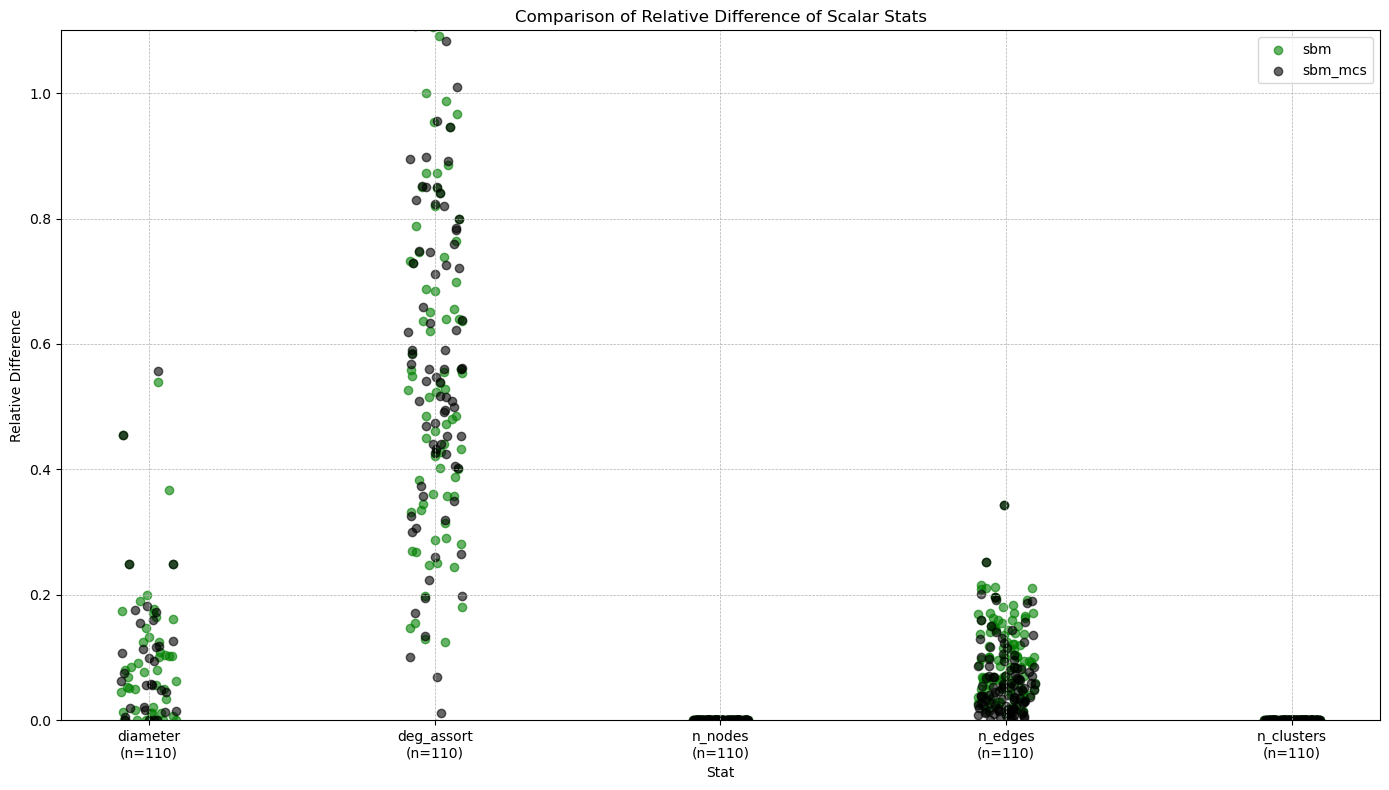

In [97]:
req_stats = ['diameter','deg_assort','n_nodes','n_edges','n_clusters']

# Calculate the number of non-NaN values for each stat
non_nan_counts = stat_df.groupby('stat').apply(lambda x: x[['sbm_0.001_mean', 'sbm_mcs_0.001_mean']].notna().all(axis=1).sum())

# Plotting
plt.figure(figsize=(14, 8))

# Add jitter for visualization
jitter = 0.1
x_values = {stat: i for i, stat in enumerate(req_stats)}

# Plot each stat separately
for stat in req_stats:
    specific_stat_df = stat_df[stat_df['stat'] == stat]
    
    x_pos = x_values[stat] + np.random.uniform(-jitter, jitter, size=len(specific_stat_df))
    
    plt.scatter(x_pos, specific_stat_df['sbm_0.001_mean'], color='green', label='sbm' if stat == req_stats[0] else "", alpha=0.6)
    plt.scatter(x_pos, specific_stat_df['sbm_mcs_0.001_mean'], color='black', label='sbm_mcs' if stat == req_stats[0] else "", alpha=0.6)

# Customize plot
plt.xlabel('Stat')
plt.ylabel('Relative Difference')
plt.ylim(0, 1.1)
plt.title('Comparison of Relative Difference of Scalar Stats')
# Create x-tick labels with non-NaN counts
x_tick_labels = [f"{stat}\n(n={non_nan_counts[stat]})" for stat in req_stats]
plt.xticks(list(x_values.values()), x_tick_labels, rotation=0)
# plt.xticks(list(x_values.values()), list(x_values.keys()), rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

### Scalar Stats - Abs Diff

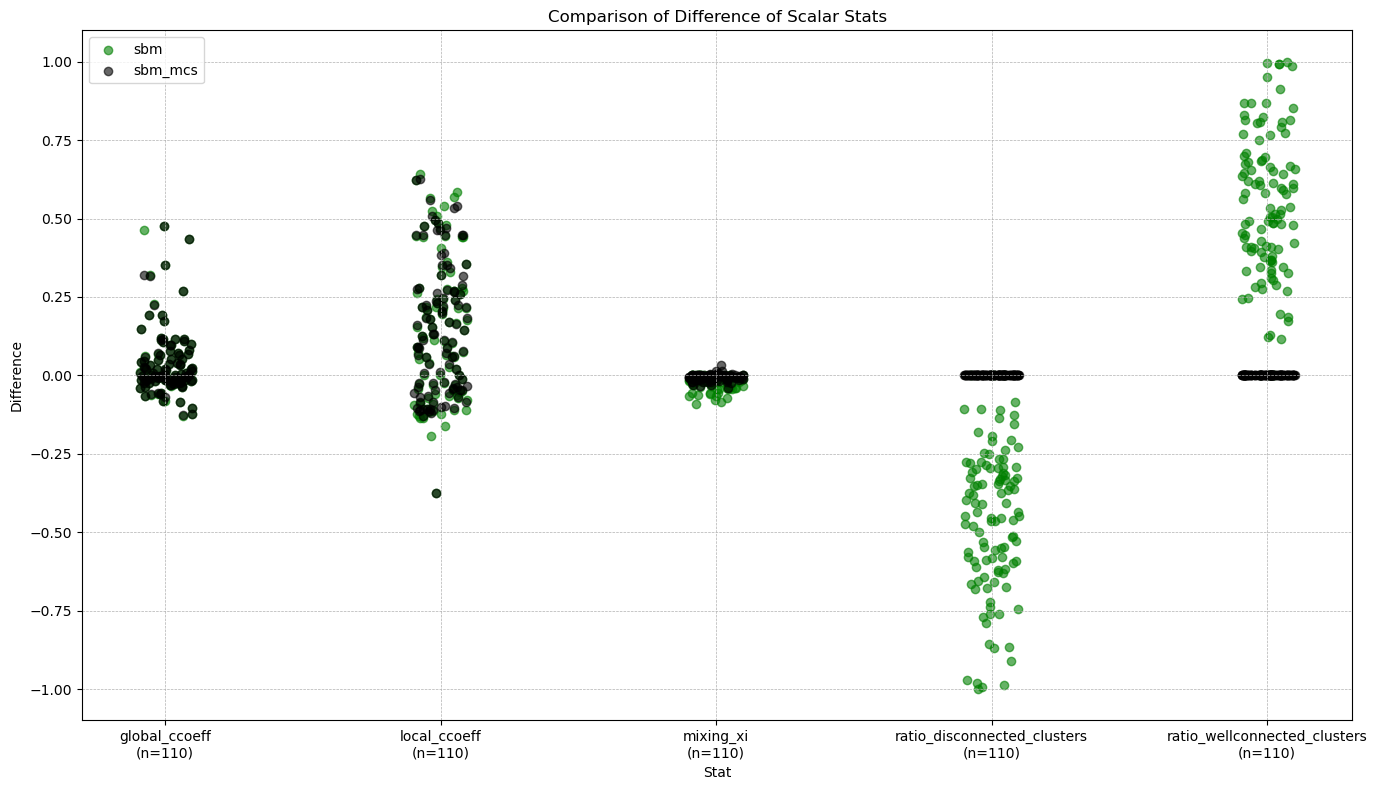

In [98]:
req_stats = ['global_ccoeff','local_ccoeff','mixing_xi','ratio_disconnected_clusters','ratio_wellconnected_clusters']

# Calculate the number of non-NaN values for each stat
non_nan_counts = stat_df.groupby('stat').apply(lambda x: x[['sbm_0.001_mean', 'sbm_mcs_0.001_mean']].notna().all(axis=1).sum())

# Plotting
plt.figure(figsize=(14, 8))

# Add jitter for visualization
jitter = 0.1
x_values = {stat: i for i, stat in enumerate(req_stats)}

# Plot each stat separately
for stat in req_stats:
    specific_stat_df = stat_df[stat_df['stat'] == stat]
    
    x_pos = x_values[stat] + np.random.uniform(-jitter, jitter, size=len(specific_stat_df))
    
    plt.scatter(x_pos, specific_stat_df['sbm_0.001_mean'], color='green', label='sbm' if stat == req_stats[0] else "", alpha=0.6)
    plt.scatter(x_pos, specific_stat_df['sbm_mcs_0.001_mean'], color='black', label='sbm_mcs' if stat == req_stats[0] else "", alpha=0.6)

# Customize plot
plt.xlabel('Stat')
plt.ylabel('Difference')
plt.ylim(-1.1, 1.1)
plt.title('Comparison of Difference of Scalar Stats')
# Create x-tick labels with non-NaN counts
x_tick_labels = [f"{stat}\n(n={non_nan_counts[stat]})" for stat in req_stats]
plt.xticks(list(x_values.values()), x_tick_labels, rotation=0)
# plt.xticks(list(x_values.values()), list(x_values.keys()), rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

# Full Networks

In [17]:
networks = ['cit_hepph','cit_patents','cen','orkut','wiki_talk','wiki_topcats','academia_edu','dbpedia_producer','hyves','plant_pol_robertson','advogato','dbpedia_recordlabel','inploid','polblogs','anybeat','dbpedia_starring','interactome_figeys','power','at_migrations','dbpedia_team','interactome_stelzl','prosper','berkstan_web','dbpedia_writer','interactome_vidal','python_dependency','bible_nouns','dbtropes_feature','internet_as','reactome','bibsonomy','digg_votes','jdk','slashdot_threads','bitcoin_alpha','discogs_label','jester','slashdot_zoo','bitcoin_trust','dnc','jung','sp_infectious','bookcrossing','douban','lastfm_aminer','stackoverflow','drosophila_flybi','libimseti','stanford_web','elec','linux','topology','chess','email_enron','livemocha','twitter','chicago_road','email_eu','lkml_reply','twitter_15m','citeseer','epinions','lkml_thread','uni_email','citeulike','epinions_trust','marker_cafe','us_air_traffic','escorts','marvel_universe','visualizeus','eu_procurements','movielens_100k','wiki_article_words','faa_routes','myspace_aminer','wikiconflict','facebook_wall','nematode_mammal','wiki_link_dyn','collins_yeast','fediverse','netscience','wiki_rfa','cora','flickr_groups','new_zealand_collab','corporate_directors','fly_hemibrain','notre_dame_web','dblp_cite','fly_larva','openflights','dblp_coauthor_snap','foldoc','dbpedia_country','github','wiki_users','dbpedia_genre','google','paris_transportation','word_assoc','dbpedia_location','google_plus','petster','wordnet','dbpedia_occupation','google_web','pgp_strong','yahoo_ads']
simulators = ['sbm','sbm_mcs']
resolutions = ['0.001']


stat_df = pd.DataFrame()
for stat, stat_type, distance_type in stats:
    for network in networks:
        stat_values = {}
        for simulator in simulators:
            for resolution in resolutions:
                stat_distances = []
                for rep in range(1):
                    try:
                        path = f'/projects/engrit/chackoge/lanne2/network_evaluation/SBM_fullnetworks_samples/{network}/{resolution}/{simulator}/rep_{rep}/compare_stats.csv'
                        df = pd.read_csv(path)
                        df = df.loc[
                            (df['stat'] == stat)
                            & (df['stat_type'] == stat_type)
                            & (df['distance_type'] == distance_type)
                        ]
                        stat_distances.append(df['distance'].values[0])
                    except Exception as e:
                        print(e)
                        print(f"Fetching stats failed for {network} {simulator} {resolution} {stat} {rep}")
                
                stat_values[f'{simulator}_{resolution}_mean'] = np.mean(stat_distances) if stat_distances else np.nan
                stat_values[f'{simulator}_{resolution}_std'] = np.std(stat_distances) if stat_distances else np.nan

        row_values = [stat,stat_type, distance_type,network] 
        index =  ['stat','stat_type','distance_type','Network']
        for key, value in stat_values.items():
            index.append(key)
            row_values.append(value)
        for i in index:
            if i not in stat_df.columns:
                stat_df[i] = np.nan
        new_row = pd.Series(row_values, index = index)
        stat_df.loc[len(stat_df)] = new_row
    


In [ ]:
stat_df.to_csv('110_fullnetworks_comparison_data.csv', index=False)

In [18]:
# Group by 'Stat' and calculate the required ratios and counts
grouped = stat_df.groupby('stat').apply(lambda group: (
    group.name,  # Get the stat label
    sum(group['sbm_0.001_mean'].notna() & group['sbm_mcs_0.001_mean'].notna() & (abs(group['sbm_0.001_mean']) >= abs(group['sbm_mcs_0.001_mean']))),
    min(group['sbm_0.001_mean'].notna().sum(),group['sbm_mcs_0.001_mean'].notna().sum()),
    sum(group['sbm_0.001_mean'].notna() & group['sbm_mcs_0.001_mean'].notna() & (abs(group['sbm_0.001_mean']) >= abs(group['sbm_mcs_0.001_mean'])))/sum(group['sbm_0.001_mean'].notna() & group['sbm_mcs_0.001_mean'].notna()),
    # np.mean((abs(group['sbm_0.001_mean'] - group['sbm_mcs_0.001_mean'])))
))

# Create a new DataFrame to store results
results_df = pd.DataFrame(grouped.values.tolist(), columns=['stat', 'Distance sbm >= sbm_mcs', 'Total_number_of_networks_considered','Proportion successful'])

# Print the results
print(results_df.to_string(index=False))

                        stat  Distance sbm >= sbm_mcs  Total_number_of_networks_considered  Proportion successful
                     c_edges                      110                                  110               1.000000
                      c_size                      110                                  110               1.000000
               concomp_sizes                      110                                  110               1.000000
                  deg_assort                       20                                  110               0.181818
                      degree                       37                                  110               0.336364
                    diameter                       63                                  110               0.572727
               global_ccoeff                       49                                  110               0.445455
                local_ccoeff                       69                                  1

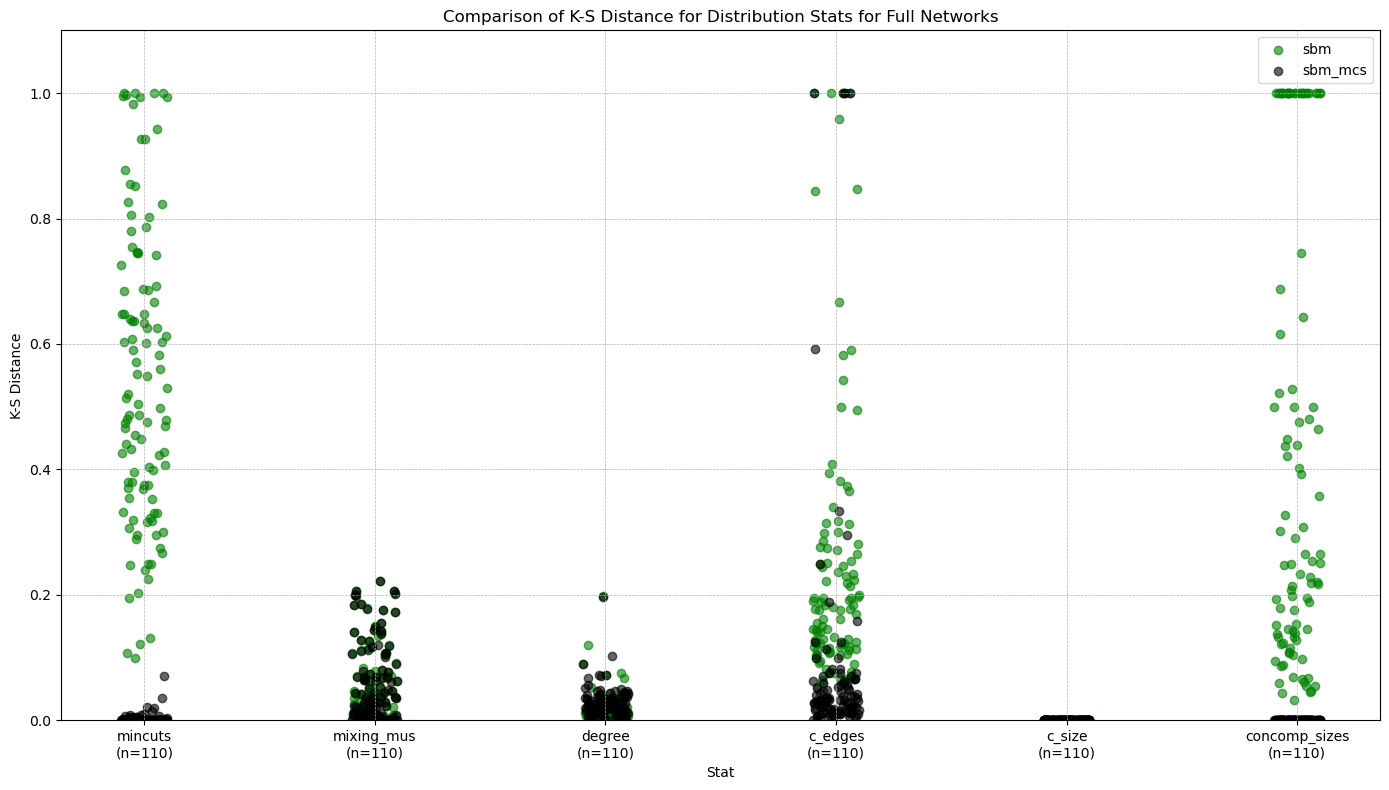

In [10]:
req_stats = ['mincuts','mixing_mus','degree','c_edges','c_size','concomp_sizes']
# Calculate the number of non-NaN values for each stat
non_nan_counts = stat_df.groupby('stat').apply(lambda x: x[['sbm_0.001_mean', 'sbm_mcs_0.001_mean']].notna().all(axis=1).sum())

# Plotting
plt.figure(figsize=(14, 8))

# Add jitter for visualization
jitter = 0.1
x_values = {stat: i for i, stat in enumerate(req_stats)}

# Plot each stat separately
for stat in req_stats:
    specific_stat_df = stat_df[stat_df['stat'] == stat]
    
    x_pos = x_values[stat] + np.random.uniform(-jitter, jitter, size=len(specific_stat_df))
    
    plt.scatter(x_pos, specific_stat_df['sbm_0.001_mean'], color='green', label='sbm' if stat == req_stats[0] else "", alpha=0.6)
    plt.scatter(x_pos, specific_stat_df['sbm_mcs_0.001_mean'], color='black', label='sbm_mcs' if stat == req_stats[0] else "", alpha=0.6)

# Customize plot
plt.xlabel('Stat')
plt.ylabel('K-S Distance')
plt.ylim(0, 1.1)
plt.title('Comparison of K-S Distance for Distribution Stats for Full Networks')
# Create x-tick labels with non-NaN counts
x_tick_labels = [f"{stat}\n(n={non_nan_counts[stat]})" for stat in req_stats]
plt.xticks(list(x_values.values()), x_tick_labels, rotation=0)
# plt.xticks(list(x_values.values()), list(x_values.keys()), rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

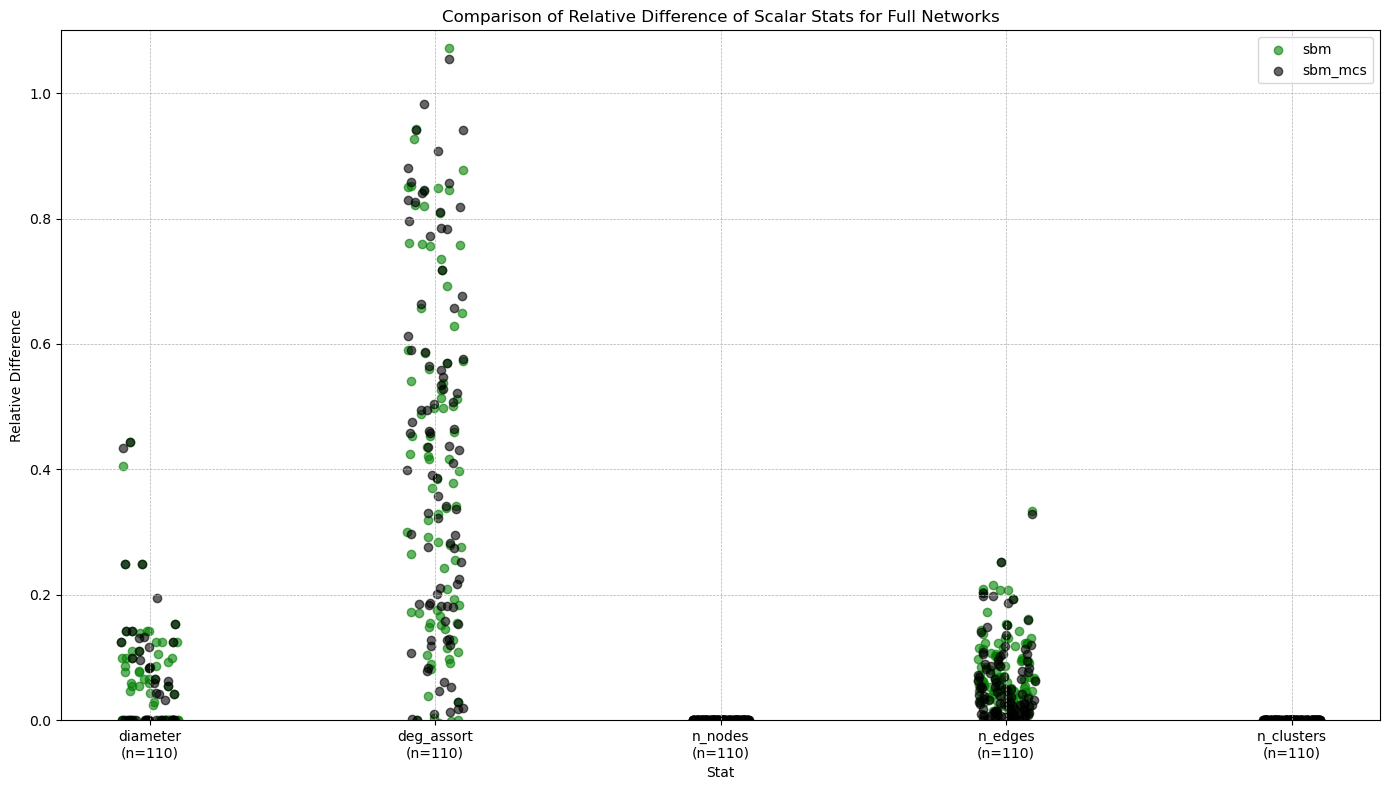

In [11]:
req_stats = ['diameter','deg_assort','n_nodes','n_edges','n_clusters']

# Calculate the number of non-NaN values for each stat
non_nan_counts = stat_df.groupby('stat').apply(lambda x: x[['sbm_0.001_mean', 'sbm_mcs_0.001_mean']].notna().all(axis=1).sum())

# Plotting
plt.figure(figsize=(14, 8))

# Add jitter for visualization
jitter = 0.1
x_values = {stat: i for i, stat in enumerate(req_stats)}

# Plot each stat separately
for stat in req_stats:
    specific_stat_df = stat_df[stat_df['stat'] == stat]
    
    x_pos = x_values[stat] + np.random.uniform(-jitter, jitter, size=len(specific_stat_df))
    
    plt.scatter(x_pos, specific_stat_df['sbm_0.001_mean'], color='green', label='sbm' if stat == req_stats[0] else "", alpha=0.6)
    plt.scatter(x_pos, specific_stat_df['sbm_mcs_0.001_mean'], color='black', label='sbm_mcs' if stat == req_stats[0] else "", alpha=0.6)

# Customize plot
plt.xlabel('Stat')
plt.ylabel('Relative Difference')
plt.ylim(0, 1.1)
plt.title('Comparison of Relative Difference of Scalar Stats for Full Networks')
# Create x-tick labels with non-NaN counts
x_tick_labels = [f"{stat}\n(n={non_nan_counts[stat]})" for stat in req_stats]
plt.xticks(list(x_values.values()), x_tick_labels, rotation=0)
# plt.xticks(list(x_values.values()), list(x_values.keys()), rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

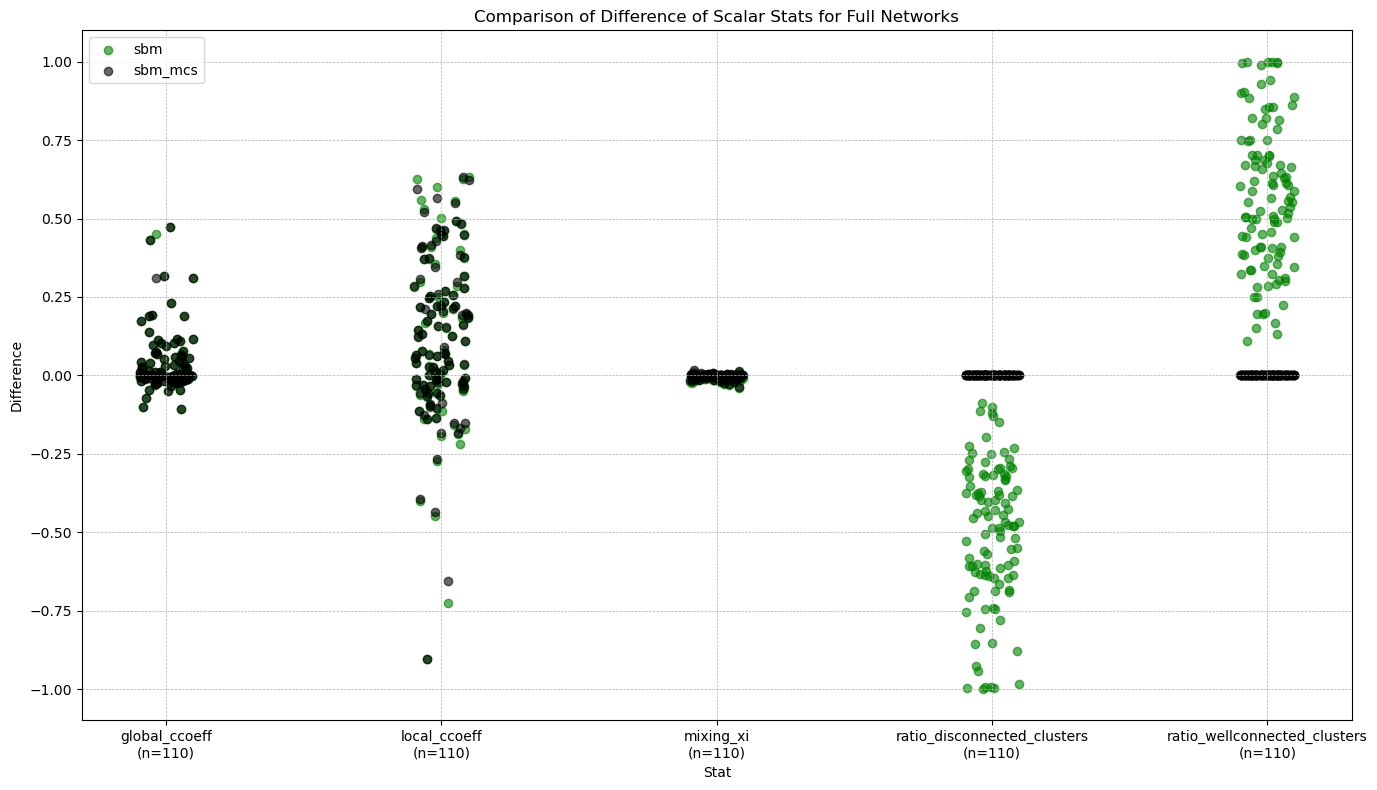

In [12]:
req_stats = ['global_ccoeff','local_ccoeff','mixing_xi','ratio_disconnected_clusters','ratio_wellconnected_clusters']

# Calculate the number of non-NaN values for each stat
non_nan_counts = stat_df.groupby('stat').apply(lambda x: x[['sbm_0.001_mean', 'sbm_mcs_0.001_mean']].notna().all(axis=1).sum())

# Plotting
plt.figure(figsize=(14, 8))

# Add jitter for visualization
jitter = 0.1
x_values = {stat: i for i, stat in enumerate(req_stats)}

# Plot each stat separately
for stat in req_stats:
    specific_stat_df = stat_df[stat_df['stat'] == stat]
    
    x_pos = x_values[stat] + np.random.uniform(-jitter, jitter, size=len(specific_stat_df))
    
    plt.scatter(x_pos, specific_stat_df['sbm_0.001_mean'], color='green', label='sbm' if stat == req_stats[0] else "", alpha=0.6)
    plt.scatter(x_pos, specific_stat_df['sbm_mcs_0.001_mean'], color='black', label='sbm_mcs' if stat == req_stats[0] else "", alpha=0.6)

# Customize plot
plt.xlabel('Stat')
plt.ylabel('Difference')
plt.ylim(-1.1, 1.1)
plt.title('Comparison of Difference of Scalar Stats for Full Networks')
# Create x-tick labels with non-NaN counts
x_tick_labels = [f"{stat}\n(n={non_nan_counts[stat]})" for stat in req_stats]
plt.xticks(list(x_values.values()), x_tick_labels, rotation=0)
# plt.xticks(list(x_values.values()), list(x_values.keys()), rotation=45)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()